# Retail AI System: Demand Prediction, Customer Segmentation & Offer Optimization
This project combines:
- Supervised Learning (Demand Prediction)
- Unsupervised Learning (Customer Segmentation)
- Reinforcement Learning (Offer Strategy Optimization)

Using libraries: NumPy, Pandas, Matplotlib, Seaborn, Scikit-learn, TensorFlow, Keras, PyTorch

In [1]:
# 1. Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import torch

In [2]:
#load dataset
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## 3. Customer Segmentation (Unsupervised Learning with Scikit-learn)

     Annual Income (k$)  Spending Score (1-100)
0                    15                      39
1                    15                      81
2                    16                       6
3                    16                      77
4                    17                      40
..                  ...                     ...
195                 120                      79
196                 126                      28
197                 126                      74
198                 137                      18
199                 137                      83

[200 rows x 2 columns]
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31    

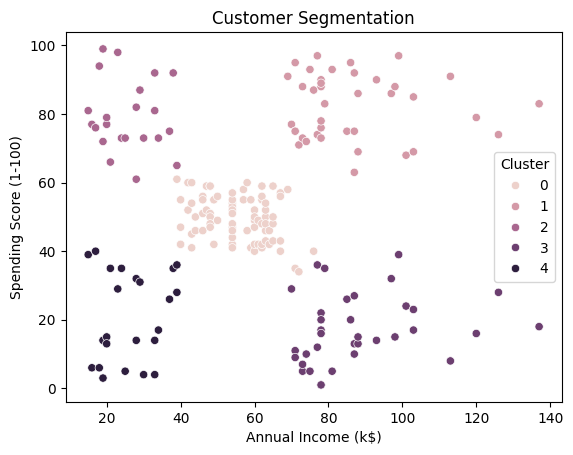

In [8]:
X = df[['Annual Income (k$)','Spending Score (1-100)']]
print(X)
Kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = Kmeans.fit_predict(X)
print(df.head())
df.to_csv('output.csv',index=False)
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)',hue='Cluster')
plt.title('Customer Segmentation')
plt.show()

## 4. Demand Prediction (Supervised Learning with Keras/TensorFlow)

In [10]:
np.random.seed(42)
demand_data=pd.DataFrame({
    'Price':np.random.randint(50,200,1000),
    'Promo':np.random.randint(0,2,1000),
    'Demand':np.random.randint(20,100,1000)
})
X = demand_data[['Price','Promo']]
y = demand_data['Demand']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


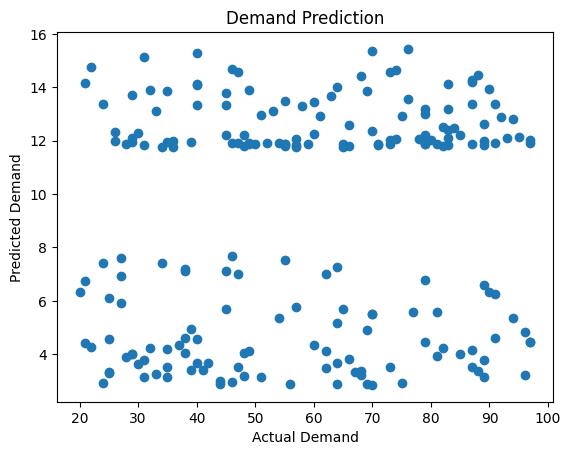

In [13]:
#build and train the model
model=Sequential([
    Dense(16,activation='relu',input_shape=(2,)),
    Dense(1)
])
model.compile(optimizer='adam',loss='mse')
model.fit(X_train_scaled,y_train,epochs=20,verbose=0)
predictions = model.predict(X_test_scaled).flatten()

#[[78.0],[76.4],[87.5]] -> [78.0,76.4,87.5]
plt.scatter(y_test,predictions)
plt.xlabel('Actual Demand')
plt.ylabel('Predicted Demand')
plt.title('Demand Prediction')
plt.show()

## 5. Offer Optimization (Reinforcement Learning with PyTorch)

In [16]:
discount = [0,5,10,20]
profits = [100,90,80,60]
q_values = torch.zeros(len(discount))
print(q_values)
lr, gamma = 0.1,0.9
for episodes in range(1000):
  action = torch.argmax(q_values).item() if np.random.rand() > 0.2 else np.random.randint(0,len(discount))
  reward = profits[action] + np.random.randint(-10,10)
  q_values[action] = q_values[action] + lr * (reward - q_values[action])
print('Best Discount: ',discount[torch.argmax(q_values).item()])

tensor([0., 0., 0., 0.])
Best Discount:  0
